<a href="https://colab.research.google.com/github/yahmskeano/Air-Quality/blob/main/DataGather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:


import openaq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl


In [6]:
pip install py-openaq


  Created wheel for py-openaq: filename=py_openaq-1.1.0-py3-none-any.whl size=9037 sha256=cc6fe4ced1093e960b0a2363d84f2c2669f72b289ac3554498a3d516fd5ba98a
  Stored in directory: /root/.cache/pip/wheels/b7/64/46/caec8d415716f8ebeb1e95f11d8c83aff852f41ab6eb1dc98f
Successfully built py-openaq


In [24]:
api = openaq.OpenAQ()

resp = api.locations(country='FR', parameter='pm25', df=True, limit=10000)
resp.drop(resp[resp['count'] > 200000].index, inplace = True)

resp

/usr/local/lib/python3.7/dist-packages/openaq/decorators.py:57: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  data = pd.io.json.json_normalize(resp)


,id,country,city,cities,location,locations,sourceName,sourceNames,sourceType,sourceTypes,firstUpdated,lastUpdated,parameters,countsByMeasurement,count,coordinates.latitude,coordinates.longitude
6,2699,FR,Meurthe-et-Moselle,"[AIR LORRAINE, ATMO GRAND EST, Meurthe-et-Mose...",FR30036,"[FR30036, Nancy-Libération, Nancy-Lib�ration]",EEA France,[EEA France],government,[government],2016-11-21 11:00:00+00:00,2021-10-05 18:00:00+00:00,"[no2, pm25, co]","[{'parameter': 'no2', 'count': 78922}, {'param...",183272,48.696323,6.146120
16,3621,FR,Bas-Rhin,"[ASPA, ATMO GRAND EST, Bas-Rhin]",FR16302,"[FR16302, Vosges Moyennes 2]",EEA France,[EEA France],government,[government],2016-11-21 12:00:00+00:00,2021-10-05 18:00:00+00:00,"[no2, o3, pm25, pm10]","[{'parameter': 'no2', 'count': 4812}, {'parame...",156518,48.493013,7.129803
17,3629,FR,Meuse,"[AIR LORRAINE, ATMO GRAND EST, Meuse]",FR01065,"[Belleville sur Meuse, FR01065]",EEA France,[EEA France],government,[government],2016-11-21 11:00:00+00:00,2021-10-05 18:00:00+00:00,"[no2, pm25]","[{'parameter': 'no2', 'count': 78695}, {'param...",154392,49.167790,5.387457
24,3655,FR,Meurthe-et-Moselle,"[AIR LORRAINE, ATMO GRAND EST, Meurthe-et-Mose...",FR30026,"[FR30026, Luneville]",EEA France,[EEA France],government,[government],2016-11-21 11:00:00+00:00,2021-10-05 18:00:00+00:00,"[co, pm25, no2]","[{'parameter': 'co', 'count': 14295}, {'parame...",171916,48.584847,6.483896
29,3677,FR,Côte-d'Or,"[ATMO BOURGOGNE-FRANCHE-COMTE, ATMOSF'AIR BOUR...",FR26043,"[Dijon-Transvaal, FR26043]",EEA France,[EEA France],government,[government],2016-11-23 00:00:00+00:00,2021-10-05 18:00:00+00:00,"[no2, pm25]","[{'parameter': 'no2', 'count': 82131}, {'param...",160598,47.315472,5.037429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,3545,FR,Drôme,"[AIR RHONE ALPES, Drôme]",FR36003,"[FR36003, Valence Trafic]",EEA France,[EEA France],government,[government],2016-11-23 00:00:00+00:00,2017-12-08 14:00:00+00:00,"[pm10, pm25, no2]","[{'parameter': 'pm10', 'count': 3008}, {'param...",7335,44.948922,4.889881
205,5352,FR,Hérault,[Hérault],FR08026,[FR08026],EEA France,[EEA France],government,[government],2017-12-07 01:00:00+00:00,2017-12-08 06:00:00+00:00,"[pm25, pm10, no2]","[{'parameter': 'pm25', 'count': 18}, {'paramet...",102,43.428219,3.603556
206,3705,FR,ATMO HAUTS DE FRANCE,"[ATMO HAUTS DE FRANCE, ATMO NORD-PAS-DE-CALAIS]",Cappelle,[Cappelle],EEA France,[EEA France],government,[government],2016-11-21 14:00:00+00:00,2017-07-18 20:00:00+00:00,"[pm25, o3, no2]","[{'parameter': 'pm25', 'count': 3282}, {'param...",9896,50.995965,2.366270
207,2673,FR,AIR NORMAND,[AIR NORMAND],Evreux Boulevard de Normandie,[Evreux Boulevard de Normandie],EEA France,[EEA France],government,[government],2016-11-21 11:00:00+00:00,2016-12-05 17:00:00+00:00,"[no2, pm25]","[{'parameter': 'no2', 'count': 33}, {'paramete...",60,49.020202,1.138713


In [25]:
def add_zero(number, last=False):
  if number < 10:
    return '0-0' + str(number)
  elif (number == 13) & (last == True):
    return '1-01'
  elif number >= 10:
    return '0-' + str(number)

def get_max(df):
  df.drop(df[df['value'] > 500].index, inplace = True)
  df['date.utc'] = pd.to_datetime(df['date.utc']).dt.date
  df = df.groupby(['location', 'date.utc'], as_index=False).mean()
  return df
def get_month_data(month):

  end_month = month+1

  month = add_zero(month)
  end_month = add_zero(end_month, True)

  df = '202'+str(month)+'-01'
  dt = '202'+str(end_month)+'-01'
  print(df)
  print(dt)

  res = api.measurements(country='FR', parameter='pm25', 
                       date_from=df,
                       date_to=dt,
                       limit=100000,
                       df=True)

  return(res)


res = pd.DataFrame()

for i in range(1,7):
  print(i)
  res = pd.concat([res, get_month_data(i)], ignore_index=True)

for i in range(7,13):
  print(i)
  res = pd.concat([res, get_month_data(i)], ignore_index=True)
res = get_max(res)


1
2020-01-01
2020-02-01


/usr/local/lib/python3.7/dist-packages/openaq/decorators.py:57: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  data = pd.io.json.json_normalize(resp)


2
2020-02-01
2020-03-01
3
2020-03-01
2020-04-01
4
2020-04-01
2020-05-01
5
2020-05-01
2020-06-01
6
2020-06-01
2020-07-01
7
2020-07-01
2020-08-01
8
2020-08-01
2020-09-01
9
2020-09-01
2020-10-01
10
2020-10-01
2020-11-01
11
2020-11-01
2020-12-01
12
2020-12-01
2021-01-01


In [26]:
res

,location,date.utc,value,coordinates.latitude,coordinates.longitude
0,FR01011,2020-01-01,42.333333,49.119427,6.180831
1,FR01011,2020-01-02,14.758333,49.119427,6.180831
2,FR01011,2020-01-03,7.195833,49.119427,6.180831
3,FR01011,2020-01-04,6.804167,49.119427,6.180831
4,FR01011,2020-01-05,9.925000,49.119427,6.180831
...,...,...,...,...,...
50670,FR82070,2020-12-27,12.650000,47.351270,6.359722
50671,FR82070,2020-12-29,4.500000,47.351270,6.359722
50672,FR82070,2020-12-30,5.718750,47.351270,6.359722
50673,FR82070,2020-12-31,5.523810,47.351270,6.359722


No handles with labels found to put in legend.


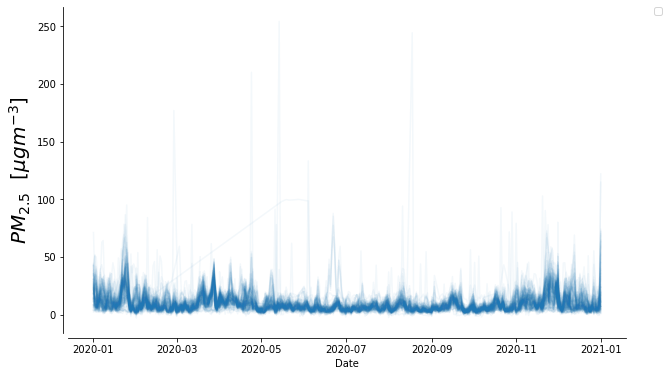

In [11]:
fig, ax = plt.subplots(1, figsize=(10, 6))

sns.lineplot(data=res.query('value <=500'), x='date.utc', y='value',
             units='location', alpha=0.05, estimator=None)
sns.despine(offset=5)
ax.set_ylabel("$PM_{2.5}$  [$\mu g m^{-3}$]", fontsize=20)
ax.set_xlabel("Date")


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

No handles with labels found to put in legend.


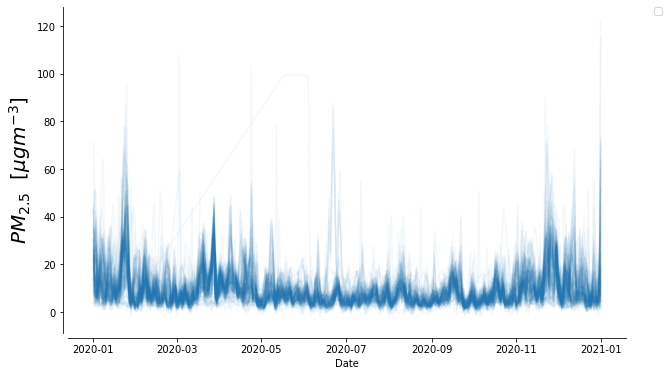

In [27]:
fig, ax = plt.subplots(1, figsize=(10, 6))

sns.lineplot(data=res.query('value <=500'), x='date.utc', y='value',
             units='location', alpha=0.05, estimator=None)
sns.despine(offset=5)
ax.set_ylabel("$PM_{2.5}$  [$\mu g m^{-3}$]", fontsize=20)
ax.set_xlabel("Date")


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

In [28]:
res.to_csv('2020_measures.csv')